In [1]:
# Point to the folder with the results of an SMC 
#folder = './resources/smc_results'
#folder = '/home/arthur/tmp/smc3_ep'
#folder = '/home/arthur/Documents/Neuromat/projects/SMC/results/python_pl_compat/bp'
folder = '/home/arthur/Documents/Neuromat/projects/SMC/results/python_pl/ep'
folder = '/home/arthur/Documents/Neuromat/projects/SMC/results/python/ep'
#folder = '/home/arthur/Documents/Neuromat/projects/SMC/results/tmp3/bp'

In [2]:
import sys
sys.path.insert(0,'../..')
from g4l.reports.smc import SmcReport
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', None)

report = SmcReport(folder)
report.load_trees()
print("Total champion trees: ", len(report.champion_trees), '\n')

Total champion trees:  55 



In [3]:
n = 10
df = report.trees_dataframe(n=n)[['tree']]
opt = report.optimal_tree()
df['sel'] = ['*' if t.to_str()==opt.to_str() else ' ' for t in list(reversed(report.champion_trees))[:n]]
df

,tree,sel
0,,
1,00 10 20 30 1 2 3 4,
2,000 100 200 300 10 20 30 1 2 3 4,
3,000 100 200 300 10 20 30 001 201 21 2 3 4,
4,000 100 200 300 010 210 20 30 001 201 21 2 3 4,
5,000 100 200 300 0010 2010 210 20 30 001 201 21 2 3 4,
6,0000 2000 100 200 300 0010 2010 210 20 30 001 201 21 2 3 4,*
7,0000 2000 100 200 300 0010 2010 0210 1210 3210 4210 20 030 130 330 430 001 201 21 2 3 4,
8,0000 2000 100 200 300 0010 2010 0210 1210 3210 4210 20 030 130 330 430 0001 2001 201 21 2 3 4,
9,0000 2000 100 200 300 0010 2010 0210 1210 3210 4210 20 030 130 330 430 0001 2001 201 21 02 12 32 42 3 4,


In [4]:
print('Optimal tree:', report.optimal_tree().to_str(reverse=True))
print('Num contexts:', report.optimal_tree().num_contexts())

Optimal tree: 0000 2000 100 200 300 0010 2010 210 20 30 001 201 21 2 3 4
Num contexts: 16


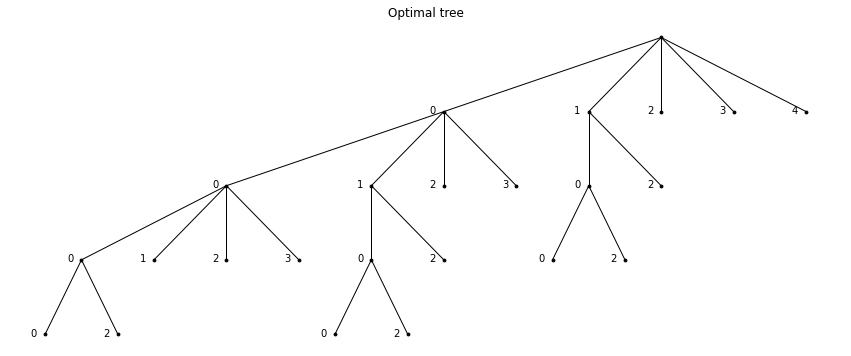

In [8]:
report.draw_tree(report.optimal_tree(), title="Optimal tree", column='symbol')

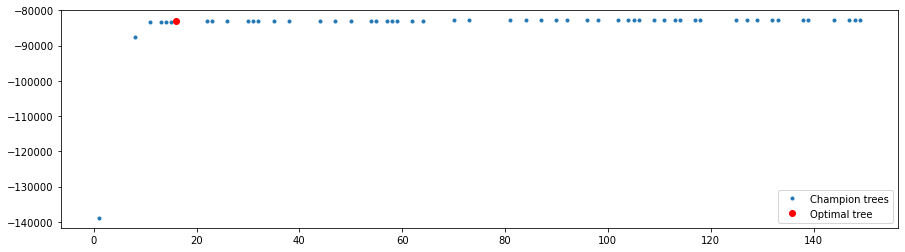

In [6]:
report.draw_likelihoods()

In [60]:
#report.likelihoods_bloxplot()
report.load_summary()

/home/arthur/anaconda3/envs/smc/lib/python3.8/site-packages/g4l/reports/smc.py:102: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.summary = yaml.load(file)


In [61]:
pd.DataFrame.from_dict(report.summary['args'])

,alpha,df,epsilon,folder,log_file,log_level,max_depth,method,n_sizes,num_cores,penalty_interval,perl_compatible,renewal_point,resamples,sample_path,scan_offset,split
0,0.01,perl,0.01,/home/arthur/Documents/Neuromat/projects/SMC/results/python/ep,None,info,4,bic,0.3,7,0.0,False,4,200,examples/linguistic_case_study/publico.txt.bkp,0,>
1,0.01,perl,0.01,/home/arthur/Documents/Neuromat/projects/SMC/results/python/ep,None,info,4,bic,0.9,7,400.0,False,4,200,examples/linguistic_case_study/publico.txt.bkp,0,>
